# Inference lecture

This notebook contains the code used to generate the plots for the Inference for Data Science lecture.

In [1]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# HIDDEN
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

In [35]:
# https://www.census.gov/data/tables/time-series/demo/income-poverty/cps-hinc/hinc-01.html
df = (pd.read_csv('incomes.csv')
      .assign(income=lambda df: df['income'].str.replace('$', '')))
df

,income,count
0,"Under 5,000",4283
1,"5,000 to 9,999",3337
2,"10,000 to 14,999",5510
...,...,...
38,"190,000 to 194,999",584
39,"195,000 to 199,999",565
40,"200,000 and over",10946


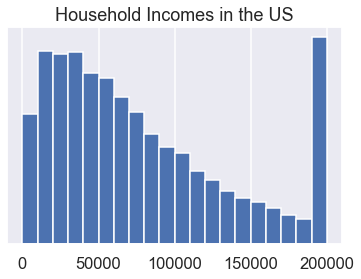

In [65]:
bins = np.arange(0, 200_001, 5000)
plt.hist(bins, weights=df['count'], bins=20)
plt.title('Household Incomes in the US');
plt.yticks([]);

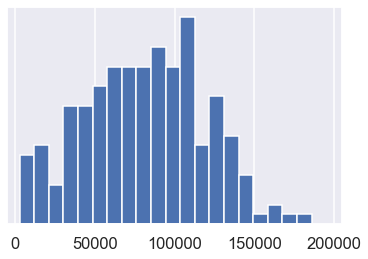

In [64]:
data = np.abs(np.random.normal(80_000, scale=40_000, size=200))
plt.hist(data, bins=20)
plt.xlim(-5000, 205_000)
plt.yticks([]);

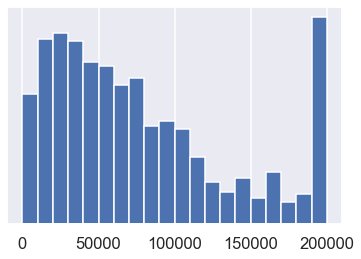

In [71]:
faked = df['count'] + np.random.normal(scale=500, size=len(df))
df_fake = df.assign(count=faked)

bins = np.arange(0, 200_001, 5000)
plt.hist(bins, weights=df_fake['count'], bins=20);
plt.yticks([]);

In [73]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


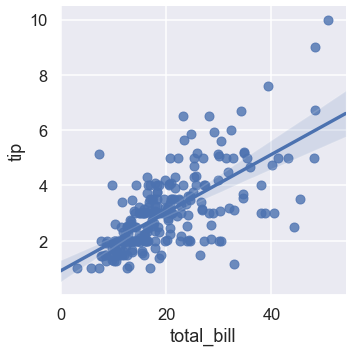

In [74]:
sns.lmplot(x="total_bill", y="tip", data=tips);

In [75]:
don = pd.read_csv('ds100/textbook/content/ch/13/donkeys.csv')
don

,BCS,Age,Sex,Length,Girth,Height,Weight,WeightAlt
0,3.0,<2,stallion,78,90,90,77,NaN
1,2.5,<2,stallion,91,97,94,100,NaN
2,1.5,<2,stallion,74,93,95,74,NaN
...,...,...,...,...,...,...,...,...
541,2.5,10-15,stallion,103,118,103,174,NaN
542,3.0,2-5,stallion,91,112,100,139,NaN
543,3.0,5-10,stallion,104,124,110,189,NaN


In [79]:
d = don.sample(50)

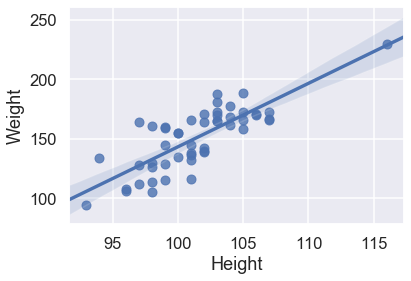

In [80]:
sns.regplot('Height', 'Weight', data=d)

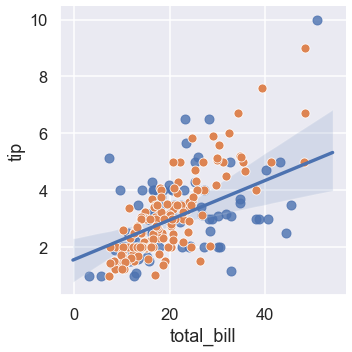

In [85]:
smokers = tips.query('smoker == "Yes"')
non = tips.query('smoker == "No"')

sns.lmplot(x="total_bill", y="tip", data=smokers)
sns.scatterplot(x="total_bill", y="tip", data=non)